In [6]:
import gymnasium as gym
import numpy as np
from random import random
import matplotlib.pyplot as plt

env = gym.make('Blackjack-v1', natural=False, sab=False)

epsilon = 0.3
alpha = 0.3
gamma = 0.95

q_table = np.zeros(
    (len(range(11,22)), len(range(10)), 2, env.action_space.n)
)

In [2]:
def get_action(state):
    if random()<epsilon:
        return env.action_space.sample()
    return np.argmax(q_table[state])

def compress_state(state):
    return (0 if state[0] < 11 else state[0] - 11, state[1]-1, state[2])

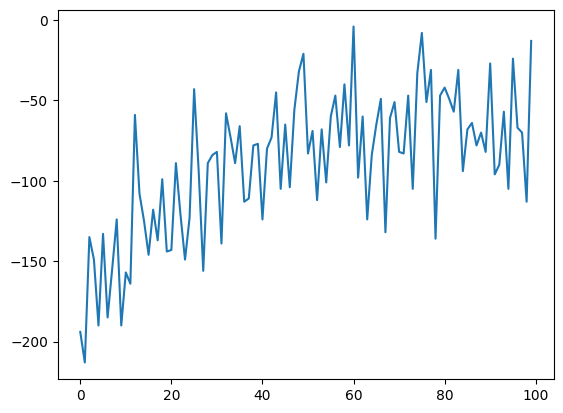

In [7]:
tat_rewards_arr = []
tat_rewards = 0

N = 100000
for episode in range(N):
    state, _ = env.reset()
    state = compress_state(state)
    done = False
    while not done:
        action = get_action(state)
        next_state, reward, done, _, _ = env.step(action)
        next_state = compress_state(next_state)
    
        if done:
            q_table[state+(action,)] += alpha * (reward - q_table[state+(action,)])
            tat_rewards += reward
        else:
            q_table[state+(action,)] += alpha * (reward + gamma*np.max(q_table[next_state]) - q_table[state+(action,)])
    
        state = next_state
        
    if episode%1000==999:
        epsilon *= 0.96
        alpha *= 0.96
        tat_rewards_arr.append(tat_rewards)
        tat_rewards = 0

plt.plot(tat_rewards_arr)
plt.show()

In [9]:
for i in range(10):
    print(i+1, ['stand', 'hit'][np.argmax(q_table[5][i][0])])

1 hit
2 stand
3 stand
4 hit
5 stand
6 stand
7 hit
8 hit
9 stand
10 hit


In [14]:
plt.savefig('./q_table_bj.png')

<Figure size 640x480 with 0 Axes>

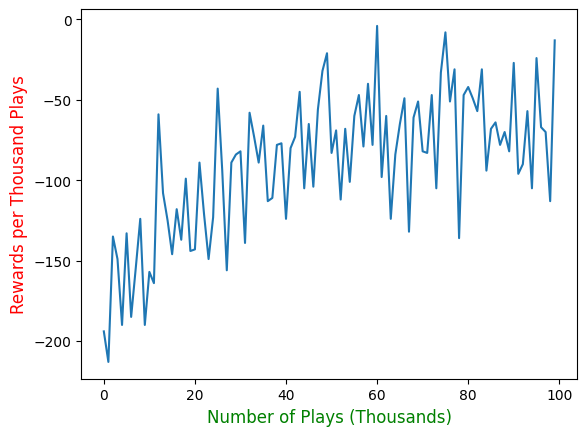

In [18]:
plt.xlabel('Number of Plays (Thousands)', fontsize=12, color='green')  # X-axis label style
plt.ylabel('Rewards per Thousand Plays', fontsize=12, color='red')  # Y-axis label style
plt.plot(tat_rewards_arr)
plt.savefig('./q_table_bj.png')


In [41]:
print('      |      莊家手牌      |')
print('你的牌 |A|2|3|4|5|6|7|8|9|T|')
for ply in range(11):
    print(f'   {ply+11} ', end='|')
    for banker in range(10):
        print(['S', 'H'][np.argmax(q_table[(ply, banker, 0)])], end='|')
    print()

      |      莊家手牌      |
你的牌 |A|2|3|4|5|6|7|8|9|T|
   11 |H|H|H|H|H|H|H|H|H|H|
   12 |H|S|H|H|H|S|H|H|H|H|
   13 |H|S|H|S|S|S|H|H|H|H|
   14 |H|H|S|S|S|H|H|H|H|H|
   15 |H|S|H|S|S|S|H|H|H|H|
   16 |H|S|S|H|S|S|H|H|S|H|
   17 |H|S|S|S|S|S|S|S|S|S|
   18 |S|S|S|S|S|S|S|S|S|S|
   19 |S|S|S|S|S|S|S|S|S|S|
   20 |S|S|S|S|S|S|S|S|S|S|
   21 |S|S|S|S|S|S|S|S|S|S|
